In [4]:
import zipfile
import pandas as pd
import io

# Path to the ZIP file
zip_file_path = 'data_YourNextPurchase.zip'

# Dictionary to store DataFrames
dataframes = {}

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the ZIP
    file_names = zip_ref.namelist()
    
    # Load CSV files into DataFrames
    for file_name in file_names:
        if file_name.endswith('.csv'):
            with zip_ref.open(file_name) as file:
                # Read the CSV file into a DataFrame
                df_name = file_name.split('/')[-1].split('.')[0]  # Use the file name (without extension) as key
                dataframes[df_name] = pd.read_csv(io.TextIOWrapper(file, encoding='utf-8'))
                
                
# Extract individual dataframes from the dictionary
clients_df = dataframes['clients']
products_df = dataframes['products']
stocks_df = dataframes['stocks']
stores_df = dataframes['stores']
transactions_df = dataframes['transactions']


In [8]:
# Print data info for all dataframes
print("Clients DataFrame Info:")
print(clients_df.info())
print("\nProducts DataFrame Info:")
print(products_df.info())
print("\nStocks DataFrame Info:")
print(stocks_df.info())
print("\nStores DataFrame Info:")
print(stores_df.info())
print("\nTransactions DataFrame Info:")
print(transactions_df.info())

Clients DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424037 entries, 0 to 424036
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ClientID          424037 non-null  int64  
 1   ClientSegment     424037 non-null  object 
 2   ClientCountry     424037 non-null  object 
 3   ClientOptINEmail  424037 non-null  int64  
 4   ClientOptINPhone  424037 non-null  int64  
 5   ClientGender      363242 non-null  object 
 6   Age               119962 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 22.6+ MB
None

Products DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148082 entries, 0 to 3148081
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   ProductID     int64 
 1   Category      object
 2   FamilyLevel1  object
 3   FamilyLevel2  object
 4   Universe      object
dtypes: int64(1), object(4)
memory usage: 120.

In [5]:
print("Clients DataFrame:")
display(clients_df.head())
print("\nProducts DataFrame:")
display(products_df.head())
print("\nStocks DataFrame:")
display(stocks_df.head())
print("\nStores DataFrame:")
display(stores_df.head())
print("\nTransactions DataFrame:")
display(transactions_df.head())

Clients DataFrame:


,ClientID,ClientSegment,ClientCountry,ClientOptINEmail,ClientOptINPhone,ClientGender,Age
0,4508698145640552159,LOYAL,USA,1,1,M,NaN
1,2022746661324934183,INACTIVE_1Y,USA,0,1,F,NaN
2,5794452591674300222,LOYAL,USA,1,1,F,NaN
3,678556389231830160,LOYAL,USA,1,1,M,NaN
4,877301557964624234,LOYAL,USA,1,1,F,NaN



Products DataFrame:


,ProductID,Category,FamilyLevel1,FamilyLevel2,Universe
0,8588329712199129922,Basketball,Shoes,Adidas Harden Vol. 4,Women
1,2134543135517272693,Football,Shoes,Nike Mercurial Vapor,Women
2,7624925797167026532,Football,Ball,Nike Ordem V,Women
3,2270862675779333216,Football,Jersey,Adidas Home Jersey,Men
4,6504730903144736800,Football,Shorts,Adidas Squadra 21,Women



Stocks DataFrame:


,StoreCountry,ProductID,Quantity
0,AUS,1284651161701379667,2.0
1,AUS,6076274819885027797,2.0
2,AUS,6019386668821120661,2.0
3,AUS,2122575437123245322,2.0
4,AUS,5901681811213086415,2.0



Stores DataFrame:


,StoreID,StoreCountry
0,7793989562498223120,BRA
1,5301108587679203543,BRA
2,2908896877692945358,BRA
3,2718131790848668199,BRA
4,7819332417840564556,BRA



Transactions DataFrame:


,ClientID,ProductID,SaleTransactionDate,StoreID,Quantity,SalesNetAmountEuro
0,5159341040532191492,7696661559050891210,2024-06-16 00:00:00+00:00,5202366601222773915,4,32.97
1,8169347797101088046,1086147279819320560,2024-12-10 00:00:00+00:00,5906069635056395270,3,87.98
2,8119209481417068505,3532473209579560668,2023-06-06 00:00:00+00:00,4821951108133690356,4,56.97
3,6144661105431601127,2935450247977233959,2024-04-04 00:00:00+00:00,7042378510114251866,2,17.99
4,2497726585282787281,5103640511191568912,2023-09-20 00:00:00+00:00,1450109522794525790,1,5.99


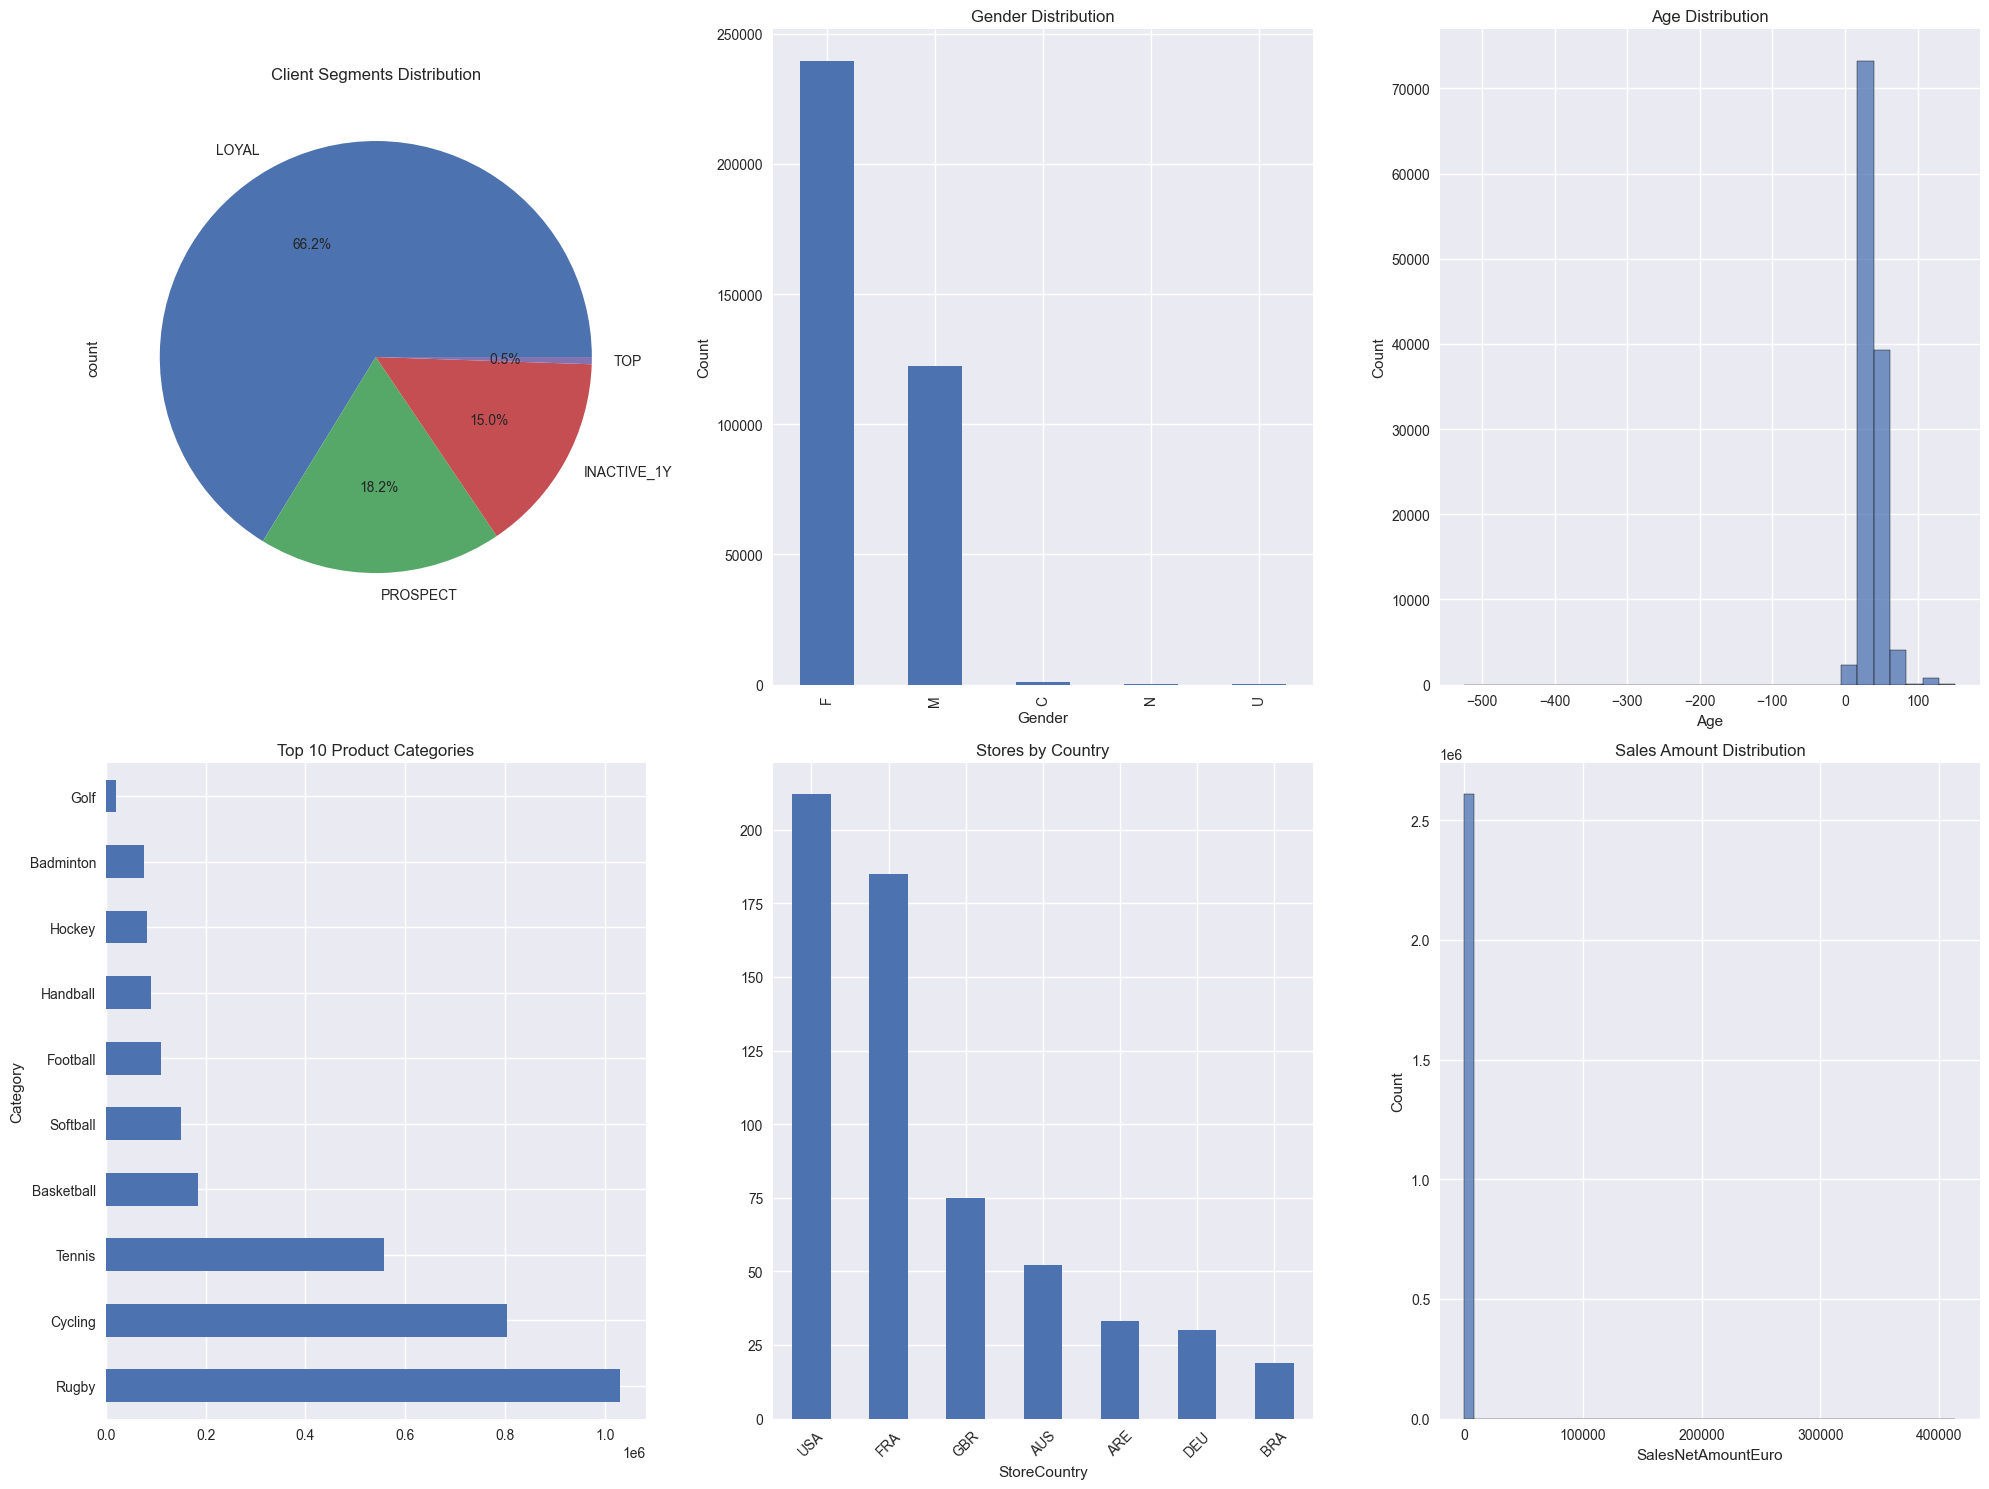

In [7]:
import seaborn as sns
from datetime import datetime

import matplotlib.pyplot as plt

# Create a figure with subplots
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 15))

# 1. Client Segments Distribution
plt.subplot(2, 3, 1)
clients_df['ClientSegment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Client Segments Distribution')

# 2. Gender Distribution
plt.subplot(2, 3, 2)
clients_df['ClientGender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 3. Age Distribution
plt.subplot(2, 3, 3)
sns.histplot(data=clients_df, x='Age', bins=30)
plt.title('Age Distribution')

# 4. Top 10 Product Categories
plt.subplot(2, 3, 4)
products_df['Category'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Product Categories')

# 5. Store Distribution by Country
plt.subplot(2, 3, 5)
stores_df['StoreCountry'].value_counts().plot(kind='bar')
plt.title('Stores by Country')
plt.xticks(rotation=45)

# 6. Sales Amount Distribution
plt.subplot(2, 3, 6)
sns.histplot(data=transactions_df, x='SalesNetAmountEuro', bins=50)
plt.title('Sales Amount Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assicuriamoci di usare lo stile Seaborn per una migliore resa grafica
plt.style.use('seaborn-v0_8')

# ===============================
# 1. Preparazione dei Dati
# ===============================

# Converto la colonna delle date in formato datetime per poterla usare nelle aggregazioni temporali
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['SaleTransactionDate'], errors='coerce')

# ===============================
# 2. Visualizzazioni Avanzate
# ===============================

# 2.1. Trend delle Vendite nel Tempo (Aggregazione Mensile)
sales_by_month = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M'))['SalesNetAmountEuro'].sum()
sales_by_month.index = sales_by_month.index.to_timestamp()  # converto l'indice in timestamp
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month.index, sales_by_month.values, marker='o')
plt.title('Andamento delle Vendite Totali (Mensile)')
plt.xlabel('Mese')
plt.ylabel('Vendite Totali (€)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 2.2. Heatmap: Vendite per Paese del Negozio e Categoria di Prodotto
# Unisco transactions con stores e products per ottenere StoreCountry e Category
merged_df = transactions_df.merge(stores_df, on='StoreID', how='left') \
                             .merge(products_df[['ProductID', 'Category']], on='ProductID', how='left')
# Aggrego le vendite per Paese e Categoria
heatmap_data = merged_df.groupby(['StoreCountry', 'Category'])['SalesNetAmountEuro'].sum().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f")
plt.title('Vendite (€) per Paese del Negozio e Categoria di Prodotto')
plt.xlabel('Categoria di Prodotto')
plt.ylabel('Paese del Negozio')
plt.show()

# 2.3. Top 10 Clienti per Vendite Totali
client_sales = transactions_df.groupby('ClientID')['SalesNetAmountEuro'].sum().sort_values(ascending=False).head(10)
top_clients = client_sales.reset_index().merge(clients_df[['ClientID', 'ClientSegment']], on='ClientID', how='left')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_clients, x='ClientID', y='SalesNetAmountEuro', hue='ClientSegment')
plt.title('Top 10 Clienti per Vendite Totali')
plt.xlabel('ClientID')
plt.ylabel('Vendite Totali (€)')
plt.legend(title='Segmento Cliente')
plt.show()

# 2.4. Top 10 Prodotti per Quantità Venduta
product_sales = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = product_sales.reset_index().merge(products_df[['ProductID', 'Category']], on='ProductID', how='left')
# Creo un'etichetta che combini ProductID e Category per una migliore interpretazione
top_products['Label'] = top_products['ProductID'].astype(str) + ' (' + top_products['Category'] + ')'
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Quantity', y='Label', orient='h')
plt.title('Top 10 Prodotti per Quantità Venduta')
plt.xlabel('Quantità Totale Venduta')
plt.ylabel('Prodotto (ID e Categoria)')
plt.show()

# 2.5. Correlazione tra Quantità e Importo delle Vendite (con campionamento)
# Per evitare sovraccarichi nel grafico, campioniamo 10.000 righe casuali
sample_df = transactions_df.sample(n=10000, random_state=42)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df, x='Quantity', y='SalesNetAmountEuro', alpha=0.3)
sns.regplot(data=sample_df, x='Quantity', y='SalesNetAmountEuro', scatter=False, color='red')
plt.title('Correlazione tra Quantità e Importo delle Vendite (Campionamento)')
plt.xlabel('Quantità Venduta')
plt.ylabel('Importo Vendite (€)')
plt.show()

# 2.6. Distribuzione del Numero di Transazioni per Cliente
transactions_per_client = transactions_df.groupby('ClientID').size()
plt.figure(figsize=(10, 6))
sns.histplot(transactions_per_client, bins=50, kde=True)
plt.title('Distribuzione del Numero di Transazioni per Cliente')
plt.xlabel('Numero di Transazioni')
plt.ylabel('Frequenza')
plt.show()

# 2.7. Vendite Totali per Giorno della Settimana
# Creo una colonna per il giorno della settimana
transactions_df['Weekday'] = transactions_df['TransactionDate'].dt.day_name()
sales_by_weekday = transactions_df.groupby('Weekday')['SalesNetAmountEuro'].sum()
# Riordino i giorni della settimana
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_weekday = sales_by_weekday.reindex(weekday_order)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values)
plt.title('Vendite Totali per Giorno della Settimana')
plt.xlabel('Giorno della Settimana')
plt.ylabel('Vendite Totali (€)')
plt.show()

# 2.8. Importo Medio delle Vendite per Fascia d\'Età dei Clienti
# Unisco transactions con clients per ottenere l'età
client_transactions = transactions_df.merge(clients_df[['ClientID', 'Age']], on='ClientID', how='left')
# Rimuovo le righe senza informazioni sull'età
client_transactions_age = client_transactions.dropna(subset=['Age']).copy()
# Definisco delle fasce d'età
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
client_transactions_age['AgeGroup'] = pd.cut(client_transactions_age['Age'], bins=bins, labels=labels, right=False)
avg_sales_agegroup = client_transactions_age.groupby('AgeGroup')['SalesNetAmountEuro'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_agegroup.index, y=avg_sales_agegroup.values)
plt.title('Importo Medio delle Vendite per Fascia d\'Età')
plt.xlabel('Fascia d\'Età')
plt.ylabel('Importo Medio (€)')
plt.show()

# 2.9. Confronto tra Quantità in Stock e Quantità Venduta per Prodotto
# Aggrego i dati degli stock per prodotto (sommo la quantità per tutti i negozi)
stock_per_product = stocks_df.groupby('ProductID')['Quantity'].sum().reset_index().rename(columns={'Quantity': 'StockQuantity'})
# Aggrego la quantità venduta per prodotto dalle transazioni
sales_per_product = transactions_df.groupby('ProductID')['Quantity'].sum().reset_index().rename(columns={'Quantity': 'SoldQuantity'})
# Unisco i due dataset
stock_sales = pd.merge(stock_per_product, sales_per_product, on='ProductID', how='inner')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stock_sales, x='StockQuantity', y='SoldQuantity', alpha=0.5)
plt.title('Confronto: Quantità in Stock vs Quantità Venduta per Prodotto')
plt.xlabel('Quantità Totale in Stock')
plt.ylabel('Quantità Totale Venduta')
plt.show()